***Neural Network & Deep Leaning Final Project***

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
normal_folder = 'Normal_Sperm'
abnormal_folder = 'Abnormal_Sperm'
non_sperm_folder = 'Non-Sperm'

In [3]:
# Function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, label, target_size=(128, 128)):
    images = []
    labels = []
    
    # Loop over the images in the folder
    for filename in os.listdir(folder):
        if filename.endswith('.bmp'):
            img_path = os.path.join(folder, filename)
            
            # Open the image using PIL
            img = Image.open(img_path)
            
            # Resize the image to a consistent shape
            img = img.resize(target_size)
            
            # Convert the image to a numpy array and normalize pixel values to range [0, 1]
            img_array = np.array(img) / 255.0  # Normalization
            
            images.append(img_array)
            labels.append(label)
    
    return images, labels

In [4]:
# Load and preprocess the images from each folder
normal_images, normal_labels = load_and_resize_images_from_folder(normal_folder, 0)  # 0 for normal sperm
abnormal_images, abnormal_labels = load_and_resize_images_from_folder(abnormal_folder, 1)  # 1 for abnormal sperm
non_sperm_images, non_sperm_labels = load_and_resize_images_from_folder(non_sperm_folder, 2)  # 2 for non sperm

In [5]:
# Combine all images and labels
all_images = np.array(normal_images + abnormal_images + non_sperm_images)
all_labels = np.array(normal_labels + abnormal_labels + non_sperm_labels)

In [6]:
# Shuffle the dataset (optional)
indices = np.random.permutation(all_images.shape[0])
all_images = all_images[indices]
all_labels = all_labels[indices]

In [7]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(all_images, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Print the shape of the data
print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}')

Training set: (2100, 128, 128, 3), Validation set: (450, 128, 128, 3), Test set: (450, 128, 128, 3)


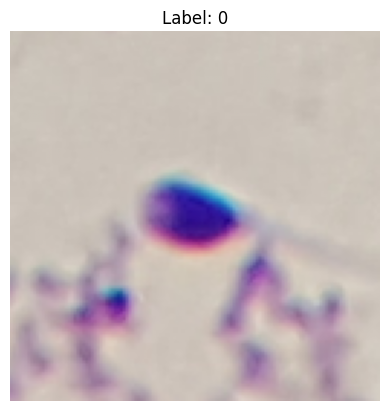

In [9]:
# Visualize a sample image
plt.imshow(X_train[0])
plt.title(f'Label: {y_train[0]}')
plt.axis('off')
plt.show()

Implementation of tensorflow framework

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models